In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [4]:
raw_df = pd.read_csv("../data/raw/players.csv", index_col=0)

In [5]:
raw_df.head()

,active_from,active_to,birth_date,college,height,name,position,url,weight,NBA__3ptapg,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,1991,1995,"June 24, 1968",Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240.0,0.0,...,0.0,NaN,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,1969,1978,"April 7, 1946",Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970,1989,"April 16, 1947","University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,0.0,...,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,1991,2001,"March 9, 1969",Louisiana State University,6-1,Mahmoud Abdul-Rauf,G,/players/a/abdulma02.html,162.0,2.3,...,2.7,NaN,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,1998,2003,"November 3, 1974","University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223.0,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4576 entries, 0 to 4575
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   active_from       4576 non-null   int64  
 1   active_to         4576 non-null   int64  
 2   birth_date        4547 non-null   object 
 3   college           4274 non-null   object 
 4   height            4575 non-null   object 
 5   name              4576 non-null   object 
 6   position          4575 non-null   object 
 7   url               4576 non-null   object 
 8   weight            4570 non-null   float64
 9   NBA__3ptapg       3448 non-null   float64
 10  NBA__3ptpct       2953 non-null   float64
 11  NBA__3ptpg        3448 non-null   float64
 12  NBA_efgpct        3426 non-null   float64
 13  NBA_fg%           4548 non-null   float64
 14  NBA_fg_per_game   4576 non-null   float64
 15  NBA_fga_per_game  4576 non-null   float64
 16  NBA_ft%           4378 non-null   float64


In [7]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
active_from,4576.0,1985.263330,21.060432,1947.000,1969.000,1987.000,2004.00000,2018.000
active_to,4576.0,1989.450393,21.937301,1947.000,1973.000,1992.000,2009.00000,2018.000
weight,4570.0,208.915974,26.243075,114.000,190.000,210.000,225.00000,360.000
NBA__3ptapg,3448.0,0.851885,1.196153,0.000,0.000,0.300,1.30000,7.800
NBA__3ptpct,2953.0,0.236988,0.161189,0.000,0.125,0.268,0.34000,1.000
NBA__3ptpg,3448.0,0.279118,0.439907,0.000,0.000,0.100,0.40000,3.400
NBA_efgpct,3426.0,0.451435,0.100671,0.000,0.421,0.464,0.49800,1.500
NBA_fg%,4548.0,0.407901,0.105117,0.000,0.366,0.423,0.46400,1.000
NBA_fg_per_game,4576.0,2.458829,1.807253,0.000,1.100,2.000,3.40000,12.100
NBA_fga_per_game,4576.0,5.818226,3.865394,0.000,2.900,5.000,7.92500,23.800


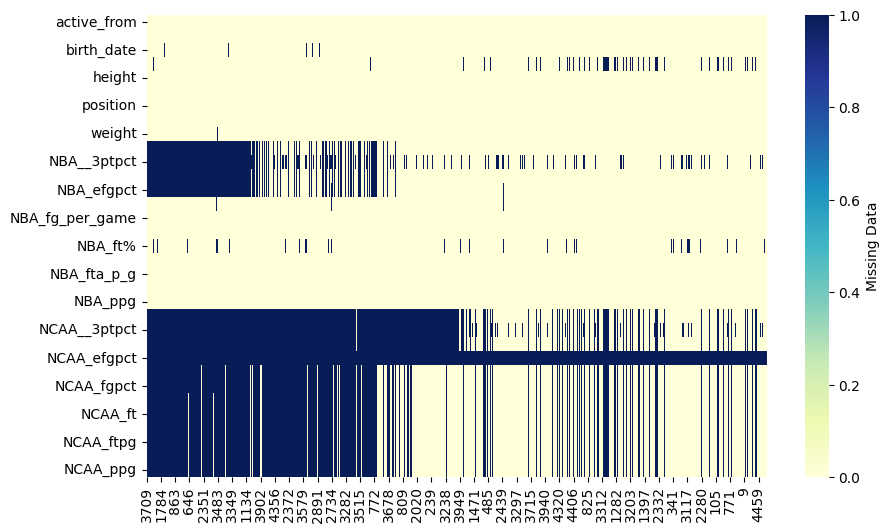

In [24]:
fig =plt.figure(figsize=(10,6))
sns.heatmap(raw_df.sort_values("active_from").isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [7]:
raw_df["position"].unique()

array(['F-C', 'C-F', 'C', 'G', 'F', 'G-F', 'F-G', nan], dtype=object)

In [25]:
# Height is in feet and categorical
raw_df["height"]

0       6-10
1        6-9
2        7-2
3        6-1
4        6-6
        ... 
4571    6-11
4572     7-1
4573     6-1
4574     7-1
4575     6-3
Name: height, Length: 4576, dtype: object

In [27]:
# Weight is in pounds
raw_df["weight"]

0       240.0
1       235.0
2       225.0
3       162.0
4       223.0
        ...  
4571    250.0
4572    240.0
4573    170.0
4574    265.0
4575    195.0
Name: weight, Length: 4576, dtype: float64

In [8]:
raw_df.columns

Index(['active_from', 'active_to', 'birth_date', 'college', 'height', 'name',
       'position', 'url', 'weight', 'NBA__3ptapg', 'NBA__3ptpct', 'NBA__3ptpg',
       'NBA_efgpct', 'NBA_fg%', 'NBA_fg_per_game', 'NBA_fga_per_game',
       'NBA_ft%', 'NBA_ft_per_g', 'NBA_fta_p_g', 'NBA_g_played', 'NBA_ppg',
       'NCAA__3ptapg', 'NCAA__3ptpct', 'NCAA__3ptpg', 'NCAA_efgpct',
       'NCAA_fgapg', 'NCAA_fgpct', 'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg',
       'NCAA_ftpg', 'NCAA_games', 'NCAA_ppg'],
      dtype='object')

# Preprocessed DF

In [96]:
df = pd.read_csv("../data/preprocessed/players.csv", index_col=0)

In [97]:
df.columns

Index(['height', 'position', 'weight', 'NBA_ppg', 'NCAA_fgapg', 'NCAA_fgpct',
       'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games',
       'NCAA_ppg', 'has_second_position'],
      dtype='object')

In [98]:
df.head()

,height,position,weight,NBA_ppg,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg,has_second_position
0,2.0828,F,240.0,5.7,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5,True
1,2.0574,C,235.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,2.1844,C,225.0,24.6,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4,False
3,1.8542,G,162.0,14.6,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0,False
4,1.9812,F,223.0,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4576 entries, 0 to 4575
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height               4575 non-null   float64
 1   position             4575 non-null   object 
 2   weight               4570 non-null   float64
 3   NBA_ppg              4576 non-null   float64
 4   NCAA_fgapg           2582 non-null   float64
 5   NCAA_fgpct           2583 non-null   float64
 6   NCAA_fgpg            2598 non-null   float64
 7   NCAA_ft              2594 non-null   float64
 8   NCAA_ftapg           2592 non-null   float64
 9   NCAA_ftpg            2598 non-null   float64
 10  NCAA_games           2598 non-null   float64
 11  NCAA_ppg             2598 non-null   float64
 12  has_second_position  4576 non-null   bool   
dtypes: bool(1), float64(11), object(1)
memory usage: 469.2+ KB


In [100]:
df = df.dropna()

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2582 entries, 0 to 4572
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height               2582 non-null   float64
 1   position             2582 non-null   object 
 2   weight               2582 non-null   float64
 3   NBA_ppg              2582 non-null   float64
 4   NCAA_fgapg           2582 non-null   float64
 5   NCAA_fgpct           2582 non-null   float64
 6   NCAA_fgpg            2582 non-null   float64
 7   NCAA_ft              2582 non-null   float64
 8   NCAA_ftapg           2582 non-null   float64
 9   NCAA_ftpg            2582 non-null   float64
 10  NCAA_games           2582 non-null   float64
 11  NCAA_ppg             2582 non-null   float64
 12  has_second_position  2582 non-null   bool   
dtypes: bool(1), float64(11), object(1)
memory usage: 264.8+ KB


<AxesSubplot: >

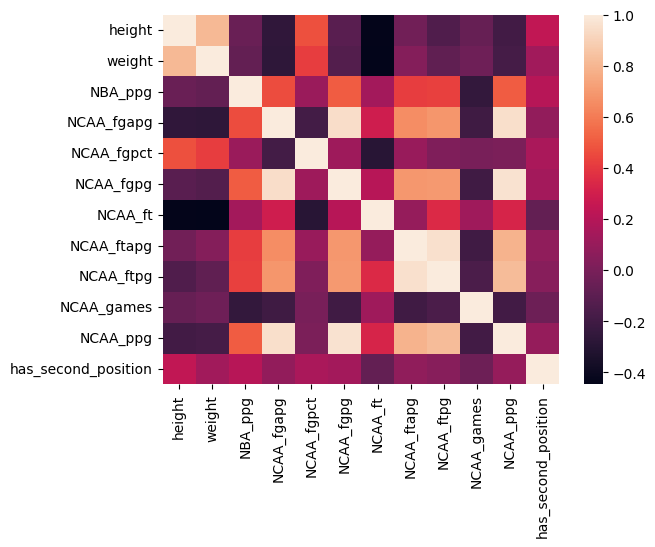

In [36]:
sns.heatmap(df.corr(numeric_only=True))

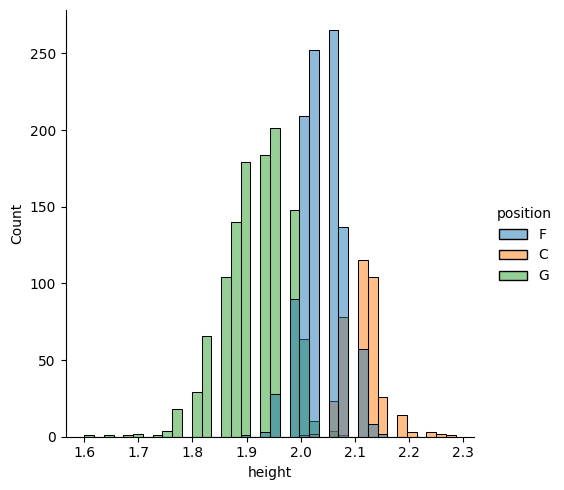

In [66]:
sns.displot(df, x="height", hue="position", stat="count")

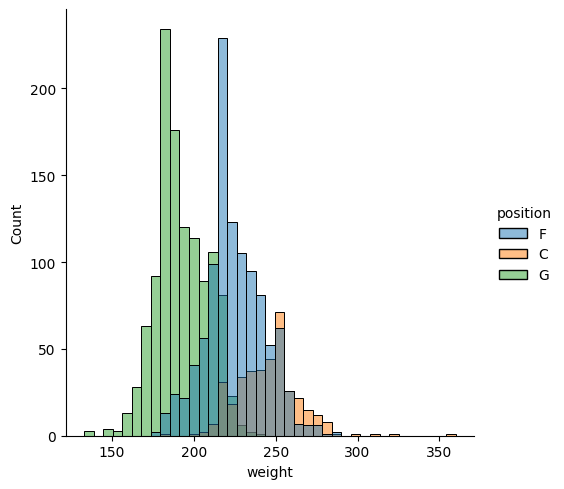

In [67]:
sns.displot(df, x="weight", hue="position", stat="count")

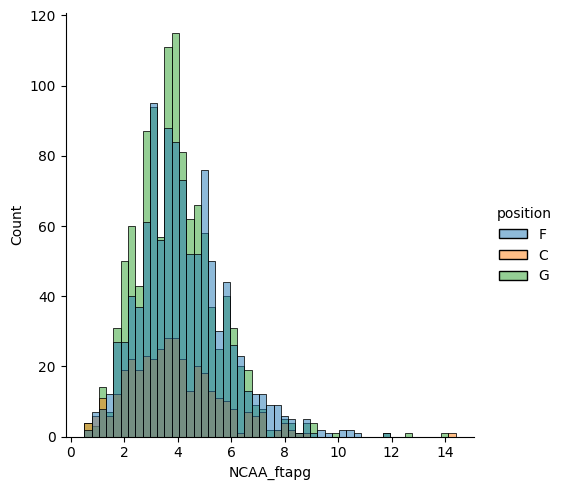

In [57]:
# "count", "density", "percent", "probability", "proportion", "frequency"
sns.displot(df, x="NCAA_ftapg", hue="position", stat="count")

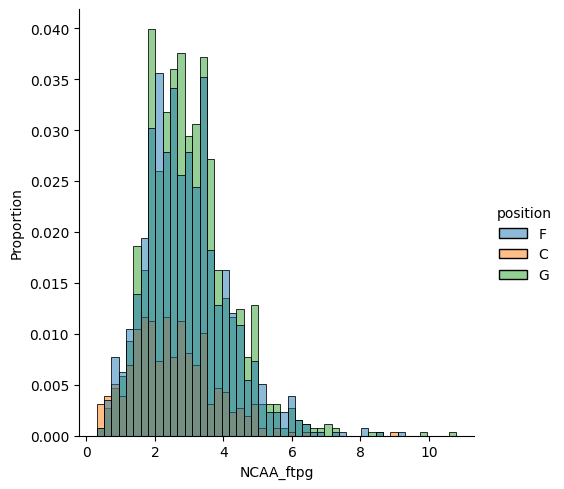

In [78]:
sns.displot(df, x="NCAA_ftpg", hue="position", stat="proportion")

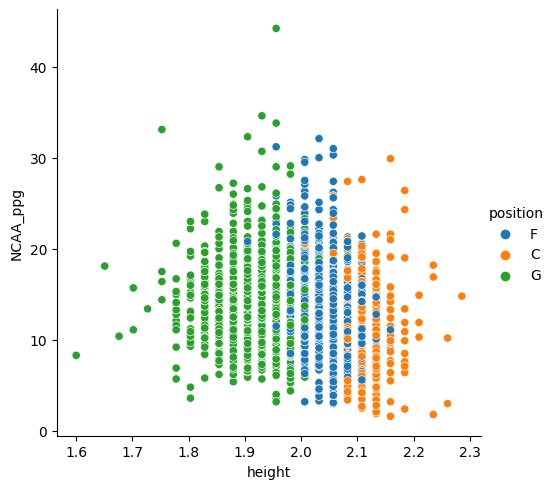

In [81]:
sns.relplot(data=df, x="height", y="NCAA_ppg", hue="position")

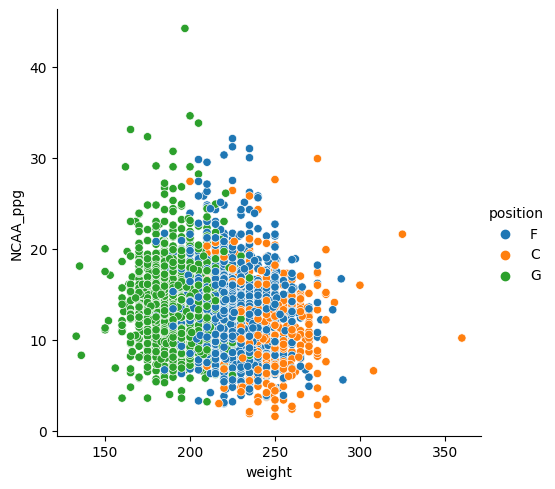

In [82]:
sns.relplot(data=df, x="weight", y="NCAA_ppg", hue="position")

# Model Training

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import validation_curve

In [103]:
df.columns

Index(['height', 'position', 'weight', 'NBA_ppg', 'NCAA_fgapg', 'NCAA_fgpct',
       'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games',
       'NCAA_ppg', 'has_second_position'],
      dtype='object')

In [114]:
df["position"] = df["position"].astype('category')

In [115]:
df["position"] = df["position"].cat.codes

In [116]:
X_columns = ['height', 'position', 'weight','NCAA_fgapg', 'NCAA_fgpct',
       'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games',
       'NCAA_ppg', 'has_second_position']
y_label = ["NBA_ppg"]

In [129]:
y = df[y_label]
X = df[X_columns]

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [265]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [256]:
lr = LinearRegression()

In [257]:
lr.fit(X_train, y_train)

LinearRegression()

In [258]:
y_pred = lr.predict(X_test)

In [259]:
mean_squared_error(y_test, y_pred)

15.86988262649662

In [260]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

3.983702125723837

In [261]:
r2_score(y_test, y_pred)

0.3567378050633542

In [262]:
dict(zip(X_columns, lr.coef_.tolist()[0]))

{'height': -3.91218680120791,
 'position': 0.14902912038616764,
 'weight': 0.0013364450562316499,
 'NCAA_fgapg': -0.4943830264466604,
 'NCAA_fgpct': 2.2212159747483913,
 'NCAA_fgpg': 1.0790902449770294,
 'NCAA_ft': -0.6425984650335758,
 'NCAA_ftapg': -0.47759077640379394,
 'NCAA_ftpg': 0.7305487124182491,
 'NCAA_games': -0.029430238755109327,
 'NCAA_ppg': 0.43145900150523503,
 'has_second_position': 1.8196800978950975}

Text(0, 0.5, 'Predicted PPG')

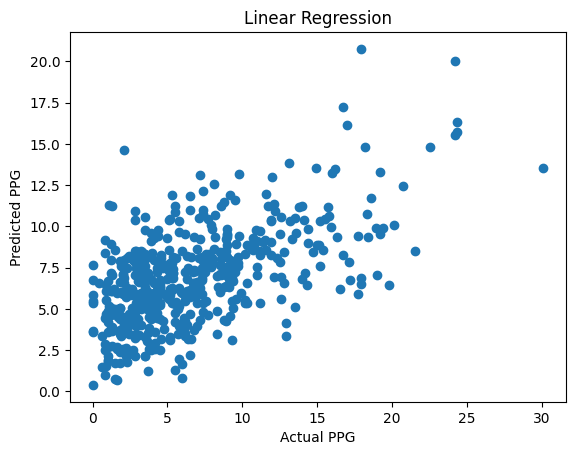

In [263]:
plt.scatter(y_test,y_pred)
plt.title('Linear Regression')
plt.xlabel('Actual PPG')
plt.ylabel('Predicted PPG')

[Text(0.5, 1.0, 'Residuals')]

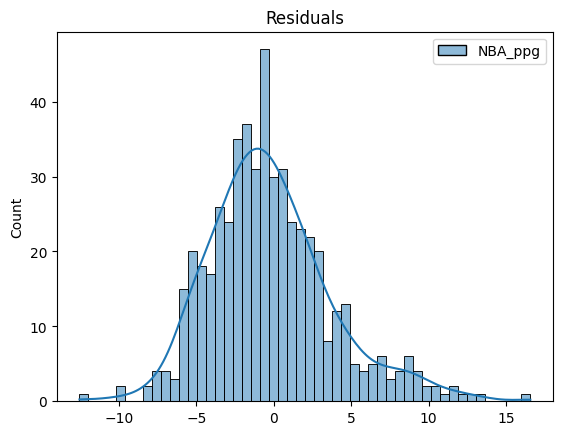

In [264]:
sns.histplot((y_test-y_pred),bins=50,kde=True, discrete=False).set(title='Residuals')

# Decision Tree

In [284]:
from sklearn.tree import DecisionTreeRegressor

In [285]:
tree = DecisionTreeRegressor()

In [286]:
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [287]:
y_pred = tree.predict(X_test)

In [288]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

5.744929645733653

# AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [152]:
reg = AdaBoostRegressor(n_estimators=100)

In [153]:
reg.fit(X_train, y_train)

C:\Users\KleberdosSantos\AppData\Local\pypoetry\Cache\virtualenvs\nba-rookie-l0xwmcef-py3.9\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(n_estimators=100)

In [241]:
y_pred = reg.predict(X_test)

In [155]:
mean_squared_error(y_test, y_pred)

27.264804363995623

In [156]:
r2_score(y_test, y_pred)

-0.10513847597206727

In [168]:
dict(zip(X_columns, reg.feature_importances_))

{'height': 0.05072638036753956,
 'position': 0.002462889418416061,
 'weight': 0.05965123649508861,
 'NCAA_fgapg': 0.06857604322906158,
 'NCAA_fgpct': 0.1387557476387856,
 'NCAA_fgpg': 0.12760078567037147,
 'NCAA_ft': 0.03290392522898528,
 'NCAA_ftapg': 0.08525556128965106,
 'NCAA_ftpg': 0.09682888328884706,
 'NCAA_games': 0.1257731210835236,
 'NCAA_ppg': 0.15934519314666298,
 'has_second_position': 0.052120233143067116}

Text(0, 0.5, 'Predicted PPG')

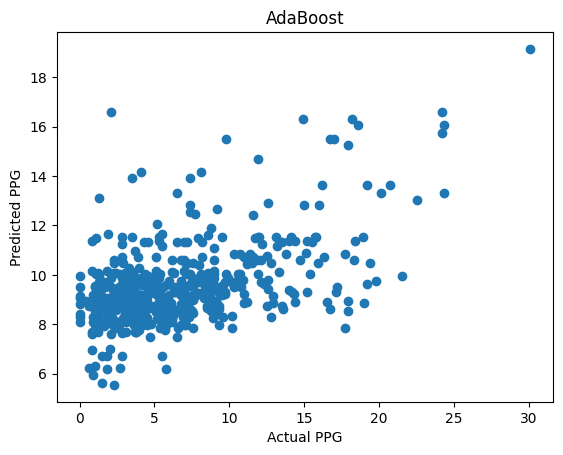

In [232]:
plt.scatter(y_test, y_pred)
plt.title('AdaBoost')
plt.xlabel('Actual PPG')
plt.ylabel('Predicted PPG')

[Text(0.5, 1.0, 'Residuals')]

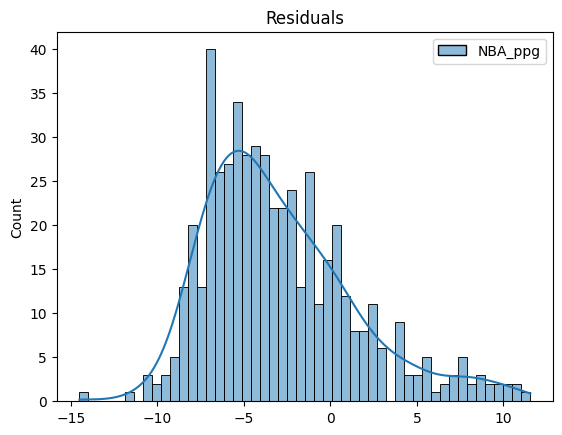

In [242]:
sns.histplot((y_test-y_pred.reshape(517, 1)),bins=50, kde=True).set(title='Residuals')